<a href="https://colab.research.google.com/github/ShubHmane/Intro-to-Data-Science-in-Python/blob/master/Life_Expectancy_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## R Project

> Indented block




In [ ]:
install.packages("caret")
install.packages("FNN")
install.packages("Formula")
install.packages("caTools")
install.packages("Hmisc")
install.packages("forecast")
install.packages("carplot")
install.packages("car")
install.packages("ROCR")
install.packages("Metrics")
install.packages("VIM")
install.packages("rpart.plot")
install.packages("rattle")
install.packages("mlbench")
install.packages("corrplot")


In [ ]:
library(caret)
library(caTools)
library(Hmisc)
library(lattice)
library(Formula)
library(survival)
library(forecast)
library(corrplot)
library(car)
library(ROCR)
library(Metrics)
library(VIM)
library(rpart)       
library(rpart.plot)  
library(rattle)
library(FNN)
library(dplyr, warn.conflicts = FALSE)
library(ggplot2)
library(tidyverse)
library(mlbench)


In [58]:
data <- read.csv("/content/Life Expectancy Data.csv")

In [ ]:
head(data)

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


In [ ]:
dim(data)

[1] 2938   22

In [ ]:
str(data)

'data.frame':	2938 obs. of  22 variables:
 $ Country                        : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                           : int  2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 ...
 $ Status                         : chr  "Developing" "Developing" "Developing" "Developing" ...
 $ Life.expectancy                : num  65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Adult.Mortality                : int  263 271 268 272 275 279 281 287 295 295 ...
 $ infant.deaths                  : int  62 64 66 69 71 74 77 80 82 84 ...
 $ Alcohol                        : num  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.03 ...
 $ percentage.expenditure         : num  71.3 73.5 73.2 78.2 7.1 ...
 $ Hepatitis.B                    : int  65 62 64 67 68 66 63 64 63 64 ...
 $ Measles                        : int  1154 492 430 2787 3013 1989 2861 1599 1141 1990 ...
 $ BMI                            : num  19.1 18.6 18.1 17.6 17.2 16.7 16.2 15.7

In [ ]:
summary(data)

   Country               Year         Status          Life.expectancy
 Length:2938        Min.   :2000   Length:2938        Min.   :36.30  
 Class :character   1st Qu.:2004   Class :character   1st Qu.:63.10  
 Mode  :character   Median :2008   Mode  :character   Median :72.10  
                    Mean   :2008                      Mean   :69.22  
                    3rd Qu.:2012                      3rd Qu.:75.70  
                    Max.   :2015                      Max.   :89.00  
                                                      NA's   :10     
 Adult.Mortality infant.deaths       Alcohol        percentage.expenditure
 Min.   :  1.0   Min.   :   0.0   Min.   : 0.0100   Min.   :    0.000     
 1st Qu.: 74.0   1st Qu.:   0.0   1st Qu.: 0.8775   1st Qu.:    4.685     
 Median :144.0   Median :   3.0   Median : 3.7550   Median :   64.913     
 Mean   :164.8   Mean   :  30.3   Mean   : 4.6029   Mean   :  738.251     
 3rd Qu.:228.0   3rd Qu.:  22.0   3rd Qu.: 7.7025   3rd Qu.:  441

In [ ]:
names(data)

[1] "Country"                         "Year"                           
 [3] "Status"                          "Life.expectancy"                
 [5] "Adult.Mortality"                 "infant.deaths"                  
 [7] "Alcohol"                         "percentage.expenditure"         
 [9] "Hepatitis.B"                     "Measles"                        
[11] "BMI"                             "under.five.deaths"              
[13] "Polio"                           "Total.expenditure"              
[15] "Diphtheria"                      "HIV.AIDS"                       
[17] "GDP"                             "Population"                     
[19] "thinness..1.19.years"            "thinness.5.9.years"             
[21] "Income.composition.of.resources" "Schooling"

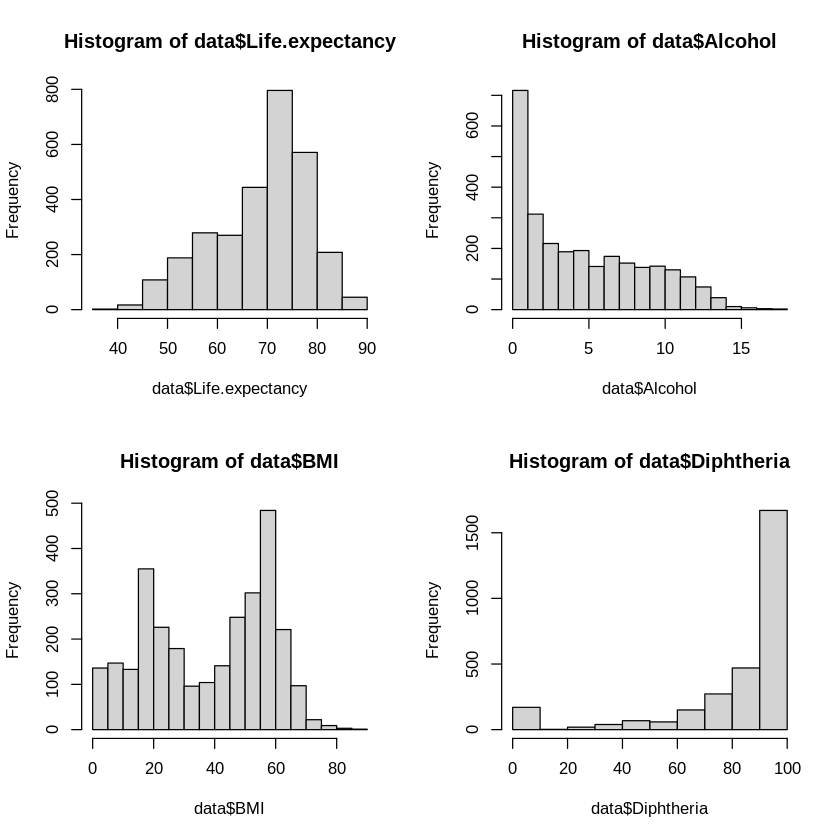

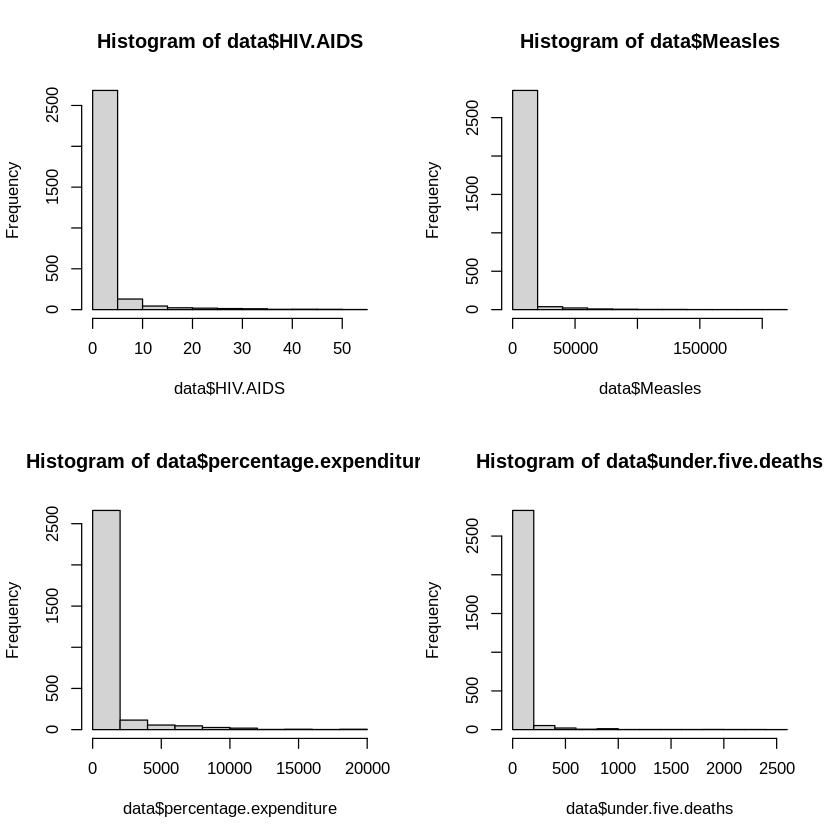

In [ ]:
par(mfrow=c(2,2))
hist(data$Life.expectancy)
hist(data$Alcohol)
hist(data$BMI)
hist(data$Diphtheria)
hist(data$HIV.AIDS)
hist(data$Measles)
hist(data$percentage.expenditure)
hist(data$under.five.deaths)

In [ ]:
sum(is.na(data))
#Data imputation by knn
mydata=kNN(data,variable=c("Alcohol","Hepatitis.B","Polio","Total.expenditure","Diphtheria","Life.expectancy",
"Adult.Mortality","thinness..1.19.years","Income.composition.of.resources","Schooling","thinness.5.9.years","BMI","Population","GDP"),k=9)
#Removing the unwanted variables created during imputation
mydata1=subset(mydata,select=Country:Schooling)

[1] 2563

In [ ]:
sum(is.na(mydata1))
head(mydata1)

[1] 0

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


In [ ]:
for (name in colnames(data)){
     if(class(data[[name]]) == 'integer' || class(data[[name]]) == 'numeric' | class(data[[name]]) == 'logical'){
         data[[name]] = impute(data[[name]],which=c('mean'))     } } ## Data Cleaning

In [ ]:
sum(is.na(data)) 

[1] 0

In [ ]:
data1 <- read.csv("/content/Life Expectancy Data.csv")

In [ ]:
head(data1[!duplicated(data1), ])


,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


In [ ]:
data_2015 <- data[which(data$Year == 2015),]
sum(is.na(data))

[1] 0

In [ ]:
length(unique(data$Country))

[1] 193

In [ ]:
head(data_2015)

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<impute>,<dbl>,<int>,<int>,⋯,<int>,<impute>,<int>,<dbl>,<dbl>,<impute>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.010,71.27962,65,1154,⋯,6,8.160,65,0.1,584.2592,33736494,17.2,17.3,0.479,10.1
17,Albania,2015,Developing,77.8,74,0,4.600,364.97523,99,0,⋯,99,6.000,99,0.1,3954.2278,28873,1.2,1.3,0.762,14.2
33,Algeria,2015,Developing,75.6,19,21,3.755,0.00000,95,63,⋯,95,5.755,95,0.1,4132.7629,39871528,6.0,5.8,0.743,14.4
49,Angola,2015,Developing,52.4,335,66,3.755,0.00000,64,118,⋯,7,5.755,64,1.9,3695.7937,2785935,8.3,8.2,0.531,11.4
65,Antigua and Barbuda,2015,Developing,76.4,13,0,3.755,0.00000,99,0,⋯,86,5.755,99,0.2,13566.9541,1386542,3.3,3.3,0.784,13.9
81,Argentina,2015,Developing,76.3,116,8,3.755,0.00000,94,0,⋯,93,5.755,94,0.1,13467.1236,43417765,1.0,0.9,0.826,17.3


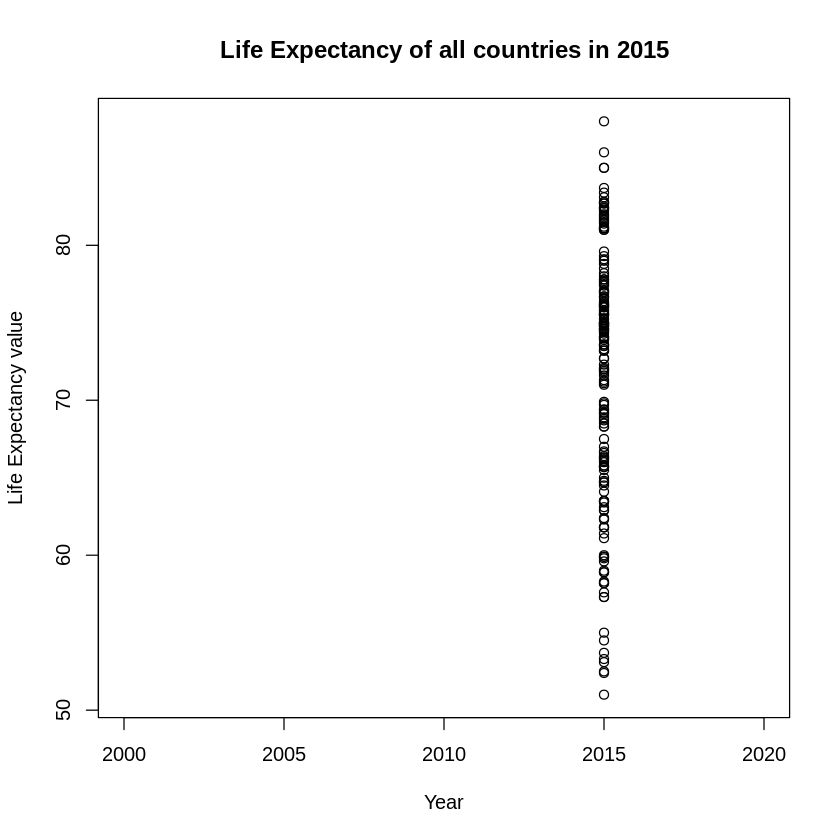

In [ ]:
yr <- c(2000 , 2020)
plot(data_2015$Year,data_2015$Life.expectancy,xlab="Year",ylab ="Life Expectancy value",main="Life Expectancy of all countries in 2015",xlim = yr)



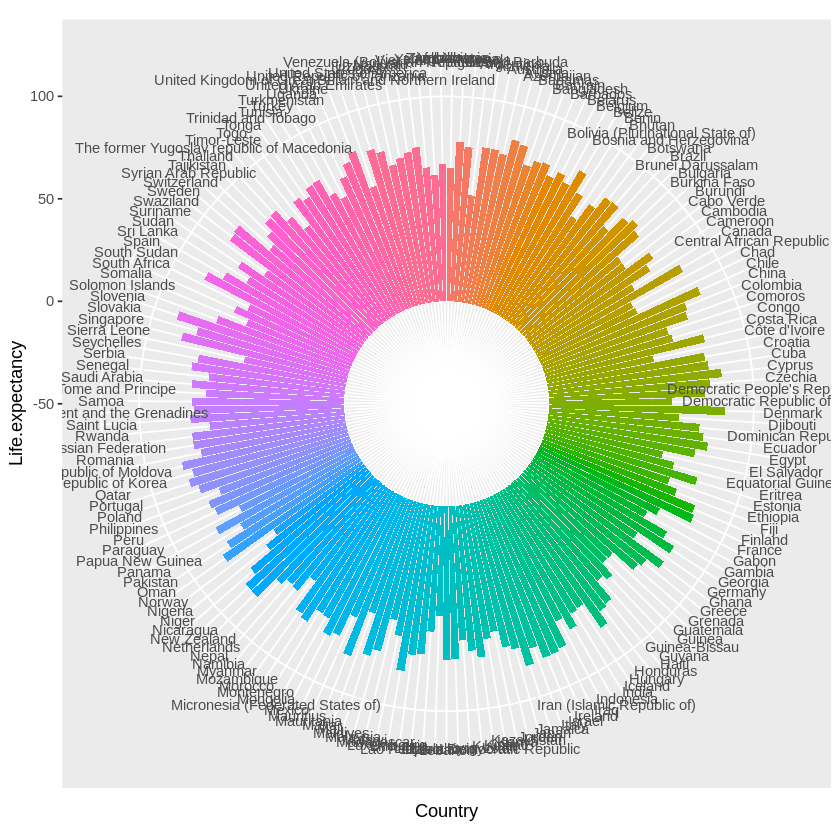

In [ ]:
ggplot(data_2015,aes(x=Country,y=Life.expectancy,fill=Country))+
geom_bar(stat = "identity")+
theme(legend.position = "none")+
ylim(-50,100)+
coord_polar(start=0)
# + geom_text(aes(label=Life.expectancy),
#                   color = "black",
#                   fontface = "bold",
#                   alpha = 0.6,
#                   size = 2.0)

In [ ]:
data_india <- data[which(data$Country == "India"),]

In [ ]:
data_india

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<impute>,<dbl>,<impute>,<int>,⋯,<int>,<impute>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1187,India,2015,Developing,68.3,181,910,3.755,0.0000000,87,90387,⋯,86,5.755,87,0.2,1613.18878,1395398,26.7,27.3,0.615,11.6
1188,India,2014,Developing,68.0,184,957,3.070,86.5215389,79,79563,⋯,84,4.690,85,0.2,1573.11889,1293859294,26.8,27.4,0.607,11.6
1189,India,2013,Developing,67.6,187,1000,3.110,67.6723044,7,13822,⋯,82,4.530,83,0.2,1452.19537,127856227,26.8,27.5,0.599,11.5
1190,India,2012,Developing,67.3,19,1100,3.100,64.9696449,73,18668,⋯,79,4.390,82,0.2,1446.98541,126365852,26.9,27.6,0.590,11.3
1191,India,2011,Developing,66.8,193,1100,3.000,64.6059005,44,33634,⋯,79,4.330,82,0.2,1461.67196,124723629,26.9,27.7,0.580,10.8
1192,India,2010,Developing,66.4,196,1200,2.770,57.7335986,38,31458,⋯,76,4.280,79,0.2,1345.77153,12398691,27.0,27.8,0.569,10.4
1193,India,2009,Developing,66.0,2,1300,2.500,0.8441863,37,56188,⋯,73,4.380,74,0.2,19.31777,121427132,27.0,27.8,0.563,10.5
1194,India,2008,Developing,65.5,23,1300,1.930,43.0304331,29,44258,⋯,69,4.340,7,0.3,991.48463,119714696,27.0,27.9,0.556,10.2
1195,India,2007,Developing,65.2,26,1400,1.590,5.2347703,6,41144,⋯,67,4.230,64,0.3,118.16637,1179681239,27.1,28.0,0.546,9.9


In [ ]:
data_india[order(data_india$Year, decreasing = FALSE),]  

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<impute>,<dbl>,<impute>,<int>,⋯,<int>,<impute>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1202,India,2000,Developing,62.5,224,1800,0.930,19.2661574,92,38835,⋯,57,4.260,58,0.3,438.86463,1535912,27.7,28.6,0.489,8.3
1201,India,2001,Developing,62.9,222,1800,1.000,19.0034061,92,51780,⋯,58,4.500,59,0.3,447.13897,171477855,27.5,28.5,0.494,8.3
1200,India,2002,Developing,63.3,219,1700,1.100,17.8120564,92,40044,⋯,58,4.400,59,0.3,466.28420,18987112,27.4,28.4,0.499,8.4
1199,India,2003,Developing,63.7,216,1700,1.190,19.4808682,92,47147,⋯,57,4.300,61,0.3,541.13523,11827848,27.3,28.3,0.505,8.6
1198,India,2004,Developing,64.0,214,1600,1.200,27.3380086,6,55443,⋯,58,4.220,63,0.3,621.31838,1126135777,27.2,28.2,0.518,9.2
1197,India,2005,Developing,64.4,211,1500,1.270,3.5096369,8,36711,⋯,65,4.280,65,0.3,77.81900,1144118674,27.2,28.1,0.526,9.4
1196,India,2006,Developing,64.8,28,1500,1.370,34.8594267,6,64185,⋯,66,4.250,65,0.3,792.25970,1161977719,27.1,28.0,0.536,9.7
1195,India,2007,Developing,65.2,26,1400,1.590,5.2347703,6,41144,⋯,67,4.230,64,0.3,118.16637,1179681239,27.1,28.0,0.546,9.9
1194,India,2008,Developing,65.5,23,1300,1.930,43.0304331,29,44258,⋯,69,4.340,7,0.3,991.48463,119714696,27.0,27.9,0.556,10.2


In [ ]:
help(plot)

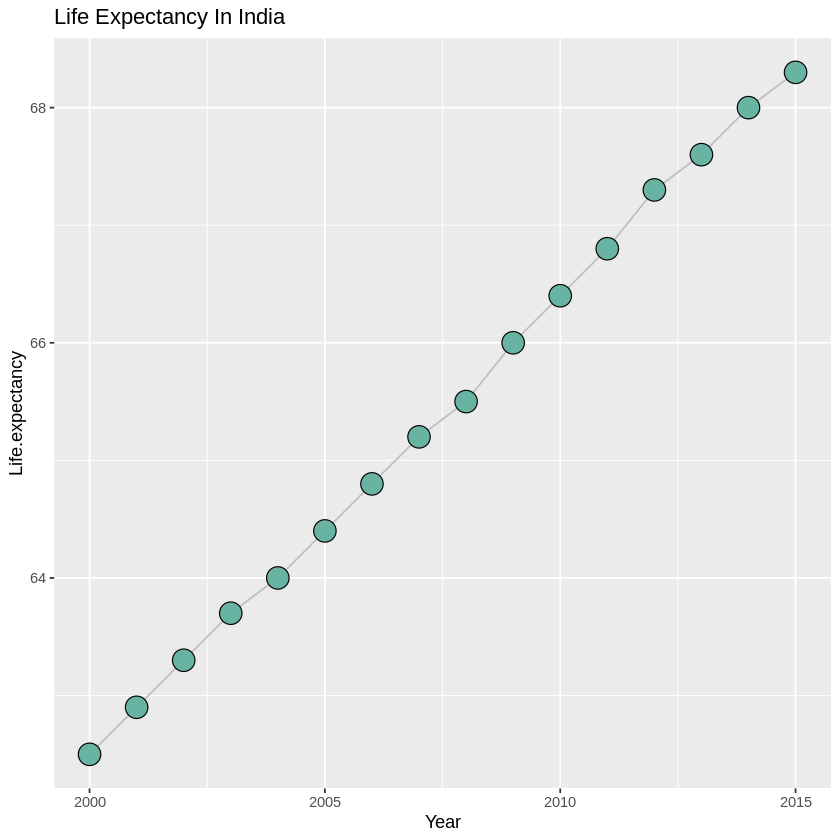

In [ ]:
   ggplot(data_india,  aes(x=Year, y=Life.expectancy)) +
   geom_line( color="grey") +
    geom_point(shape=21, color="black", fill="#69b3a2", size=6) +
    ggtitle("Life Expectancy In India")

Don't know how to automatically pick scale for object of type impute. Defaulting to continuous.



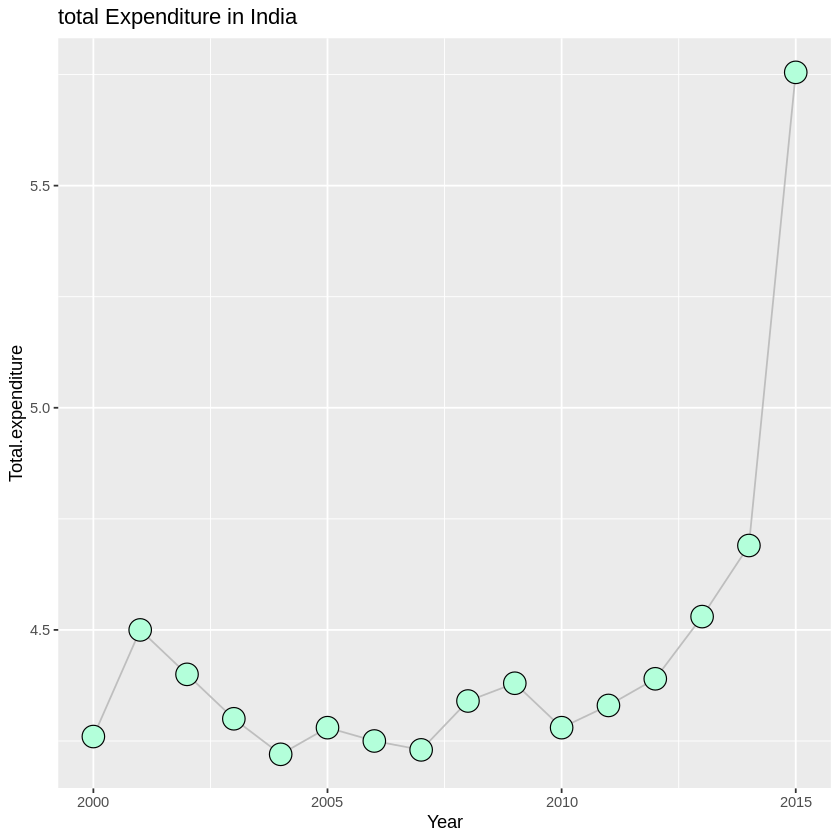

In [ ]:
ggplot(data_india, aes(x=Year, y=Total.expenditure)) +
   geom_line( color="grey") +
    geom_point(shape=21, color="black", fill="#b3ffda", size=6) +
    ggtitle("total Expenditure in India")

In [ ]:
names(data)

[1] "Country"                         "Year"                           
 [3] "Status"                          "Life.expectancy"                
 [5] "Adult.Mortality"                 "infant.deaths"                  
 [7] "Alcohol"                         "percentage.expenditure"         
 [9] "Hepatitis.B"                     "Measles"                        
[11] "BMI"                             "under.five.deaths"              
[13] "Polio"                           "Total.expenditure"              
[15] "Diphtheria"                      "HIV.AIDS"                       
[17] "GDP"                             "Population"                     
[19] "thinness..1.19.years"            "thinness.5.9.years"             
[21] "Income.composition.of.resources" "Schooling"

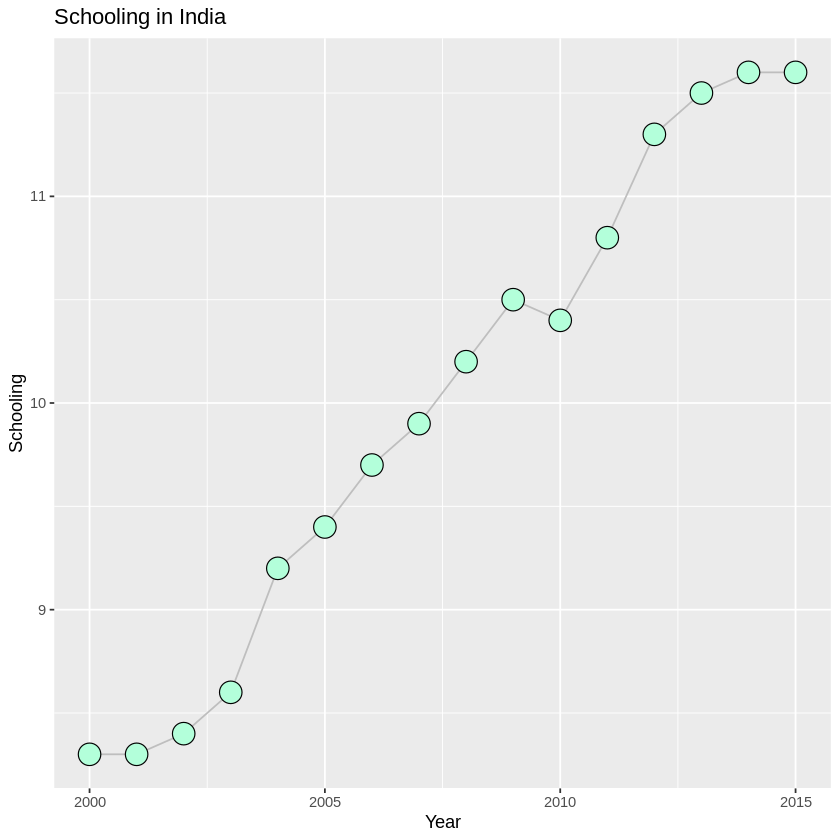

In [ ]:
 ggplot(data_india,  aes(x=Year, y=Schooling)) +
   geom_line( color="grey") +
    geom_point(shape=21, color="black", fill="#b3ffda", size=6) +
    ggtitle("Schooling in India")

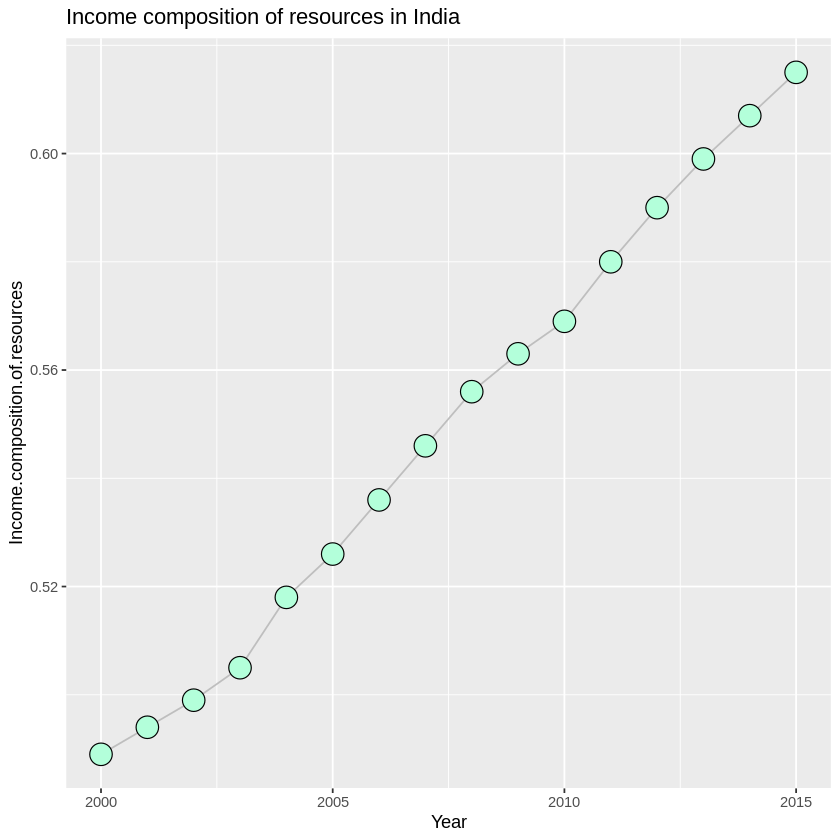

In [ ]:
 ggplot(data_india,  aes(x=Year, y=Income.composition.of.resources)) +
   geom_line( color="grey") +
    geom_point(shape=21, color="black", fill="#b3ffda", size=6) +
    ggtitle("Income composition of resources in India")

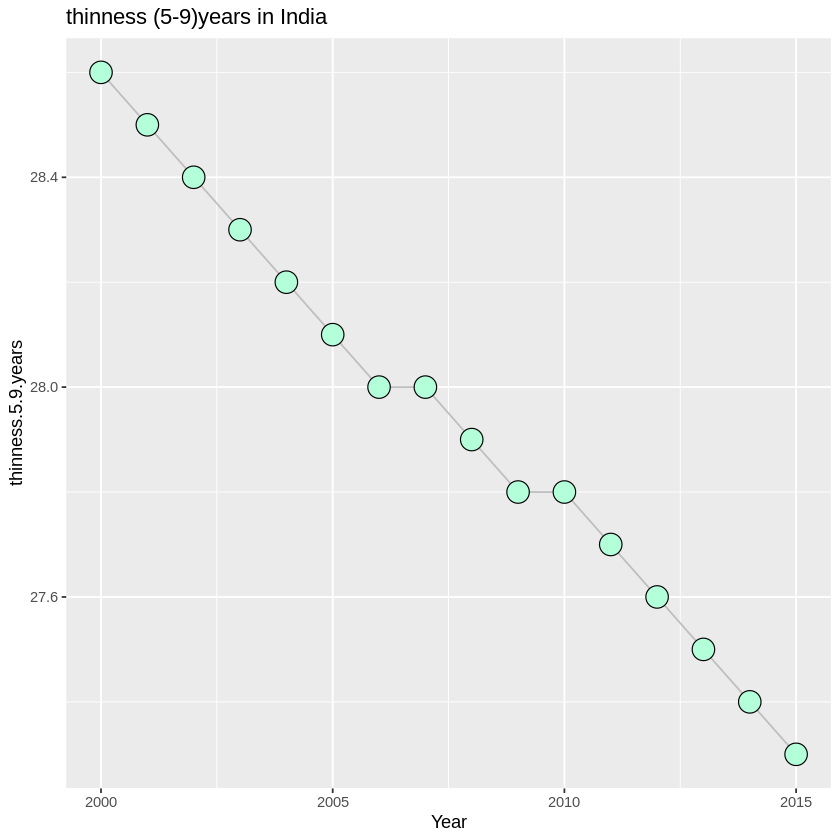

In [ ]:
ggplot(data_india,  aes(x=Year, y=thinness.5.9.years)) +
   geom_line( color="grey") +
    geom_point(shape=21, color="black", fill="#b3ffda", size=6) +
    ggtitle("thinness (5-9)years in India")

Don't know how to automatically pick scale for object of type impute. Defaulting to continuous.



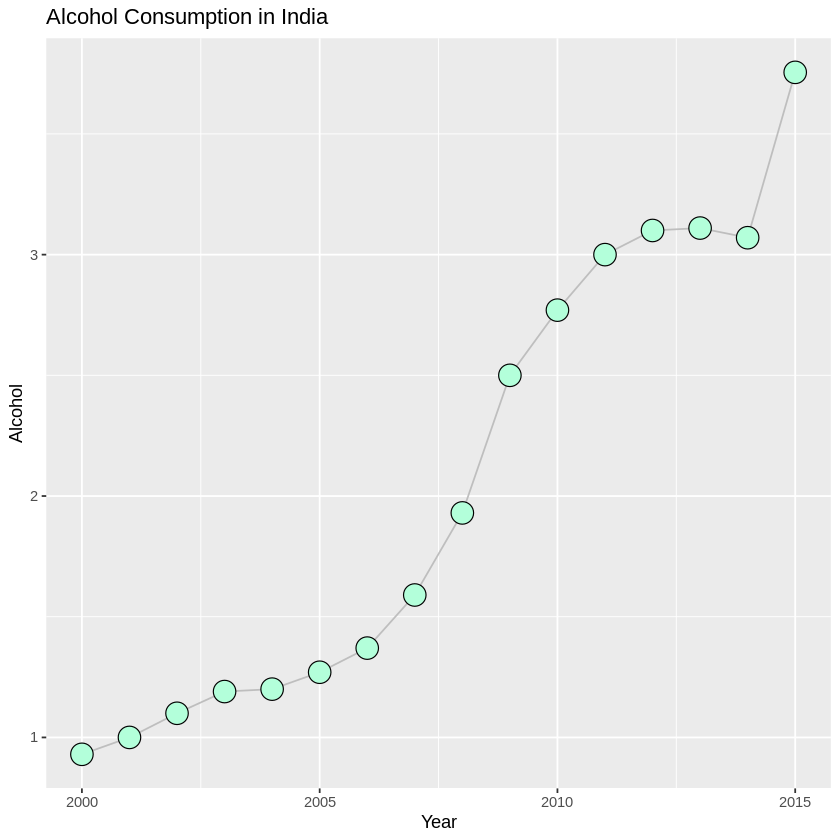

In [ ]:
   ggplot(data_india,  aes(x=Year, y=Alcohol)) +
   geom_line( color="grey") +
    geom_point(shape=21, color="black", fill="#b3ffda", size=6) +
    ggtitle("Alcohol Consumption in India")

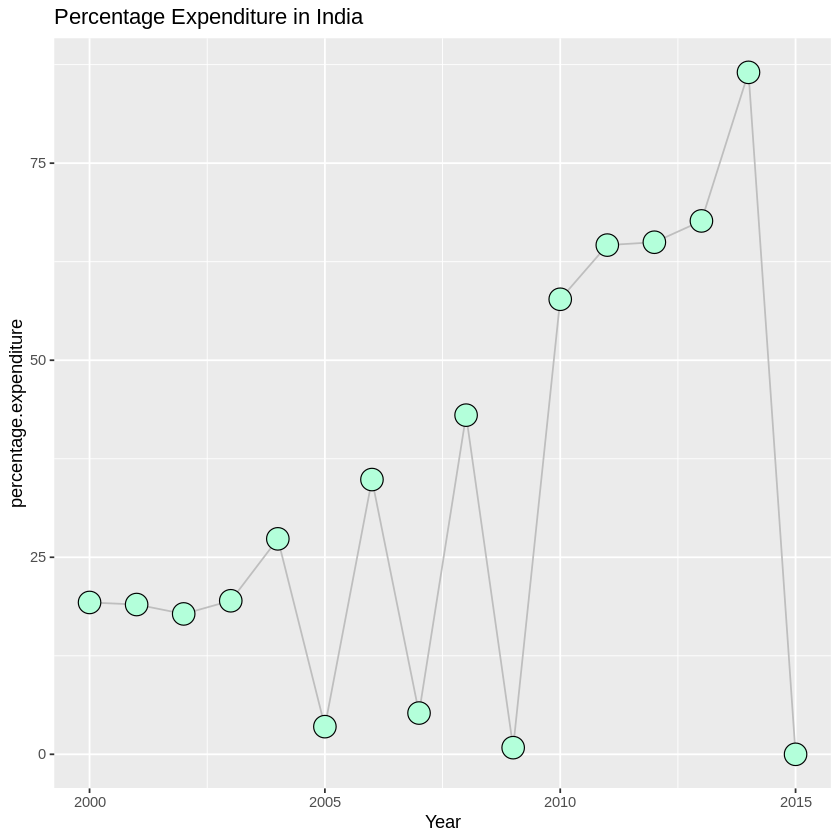

In [ ]:
 ggplot(data_india, aes(x=Year, y=percentage.expenditure)) +
   geom_line( color="grey") +
    geom_point(shape=21, color="black", fill="#b3ffda", size=6) +
    ggtitle("Percentage Expenditure in India")

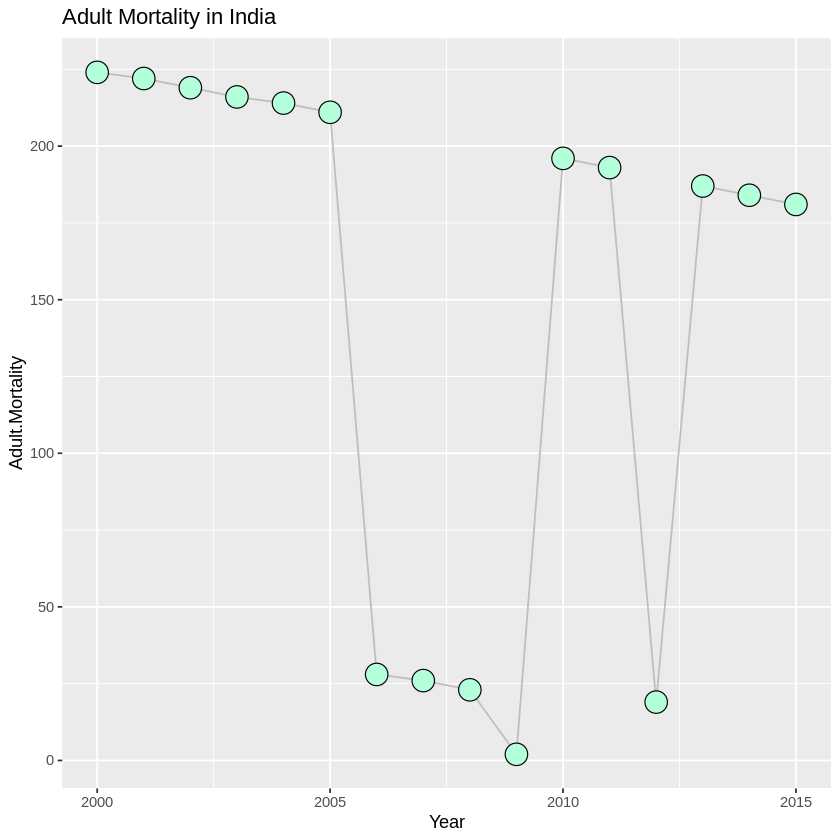

In [ ]:
ggplot(data_india, aes(x=Year, y=Adult.Mortality)) +
   geom_line( color="grey") +
    geom_point(shape=21, color="black", fill="#b3ffda", size=6) +
    ggtitle("Adult Mortality in India")

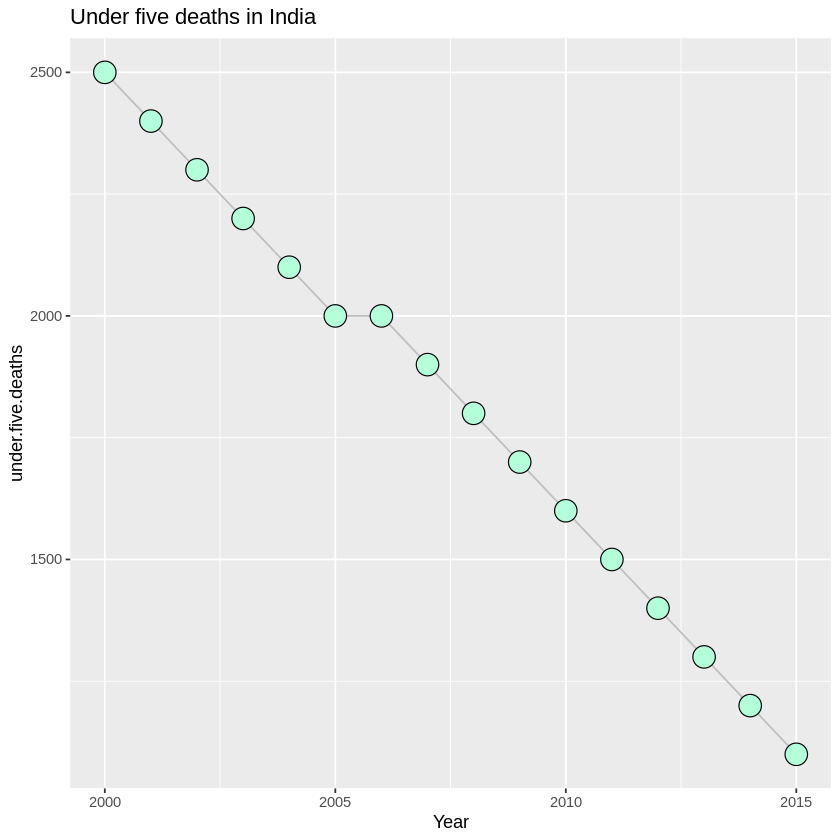

In [ ]:
ggplot(data_india, aes(x=Year, y=under.five.deaths)) +
   geom_line( color="grey") +
    geom_point(shape=21, color="black", fill="#b3ffda", size=6) +
    ggtitle("Under five deaths in India")

In [ ]:
names(data_india)

[1] "Country"                         "Year"                           
 [3] "Status"                          "Life.expectancy"                
 [5] "Adult.Mortality"                 "infant.deaths"                  
 [7] "Alcohol"                         "percentage.expenditure"         
 [9] "Hepatitis.B"                     "Measles"                        
[11] "BMI"                             "under.five.deaths"              
[13] "Polio"                           "Total.expenditure"              
[15] "Diphtheria"                      "HIV.AIDS"                       
[17] "GDP"                             "Population"                     
[19] "thinness..1.19.years"            "thinness.5.9.years"             
[21] "Income.composition.of.resources" "Schooling"

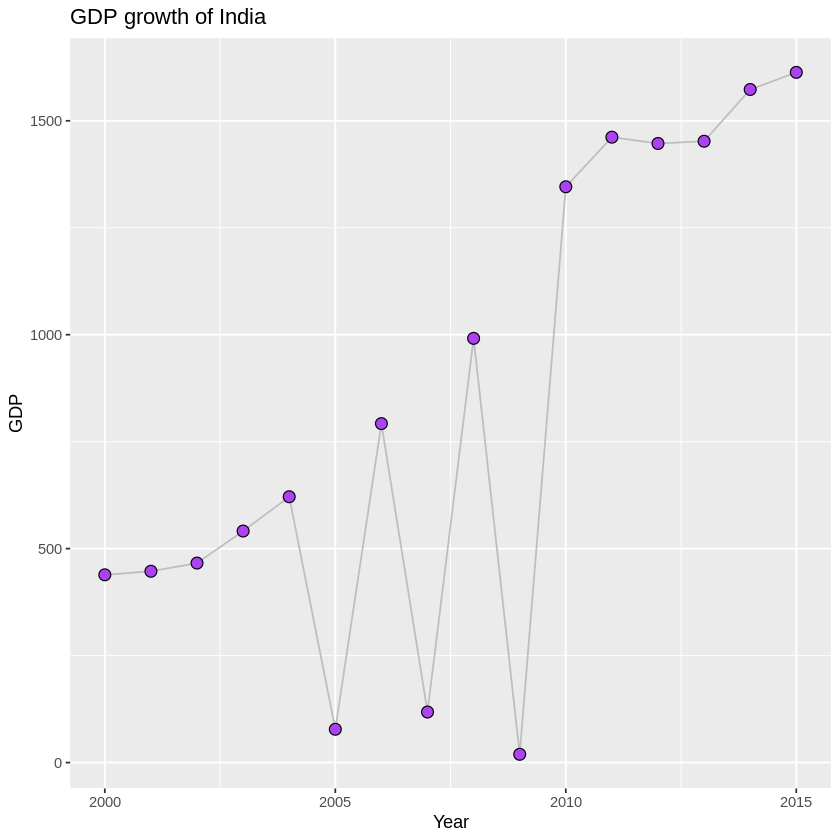

In [ ]:
ggplot(data_india,  aes(x=Year, y=GDP)) +
   geom_line( color="grey") +
    geom_point(shape=21, color="black", fill="#ad42f5", size=3) +
    ggtitle("GDP growth of India")

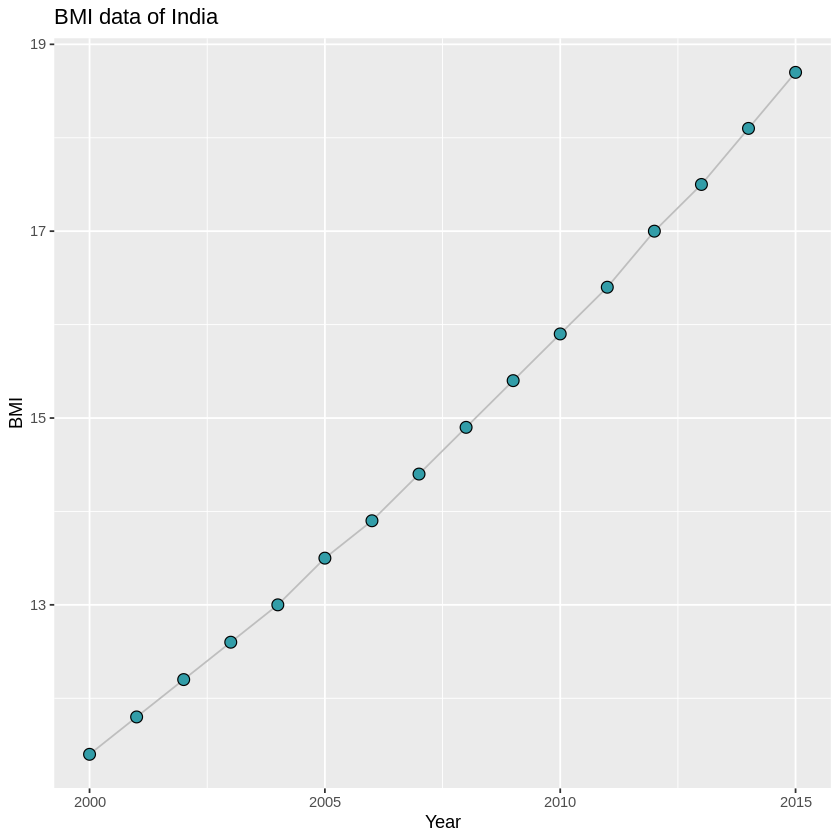

In [ ]:
ggplot(data_india,  aes(x=Year, y=BMI)) +
   geom_line( color="grey") +
    geom_point(shape=21, color="black", fill="#329da8", size=3) +
    ggtitle("BMI data of India")

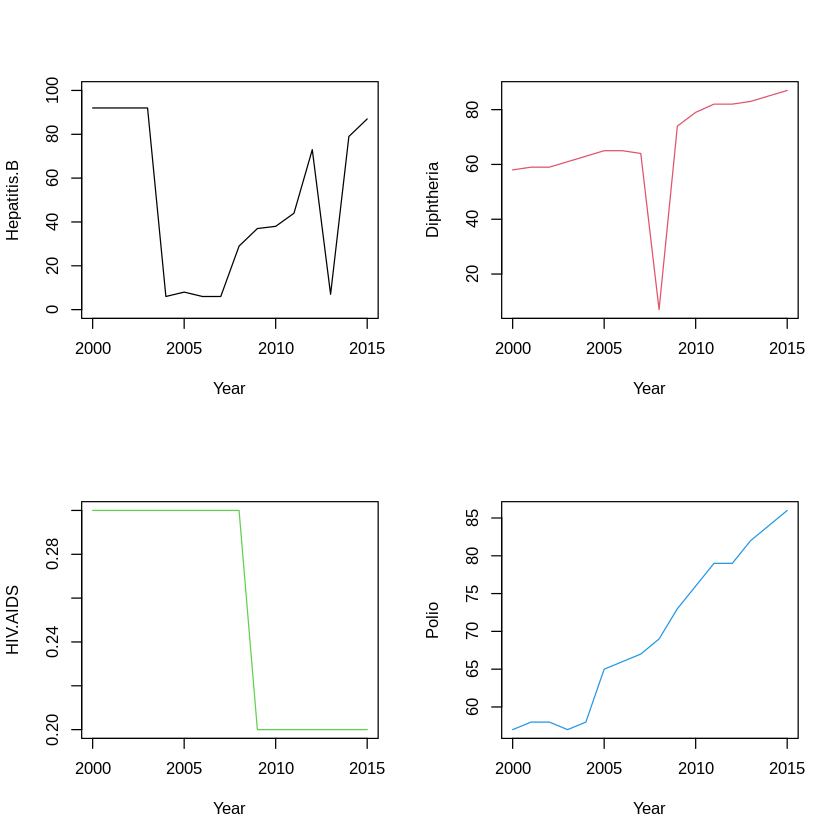

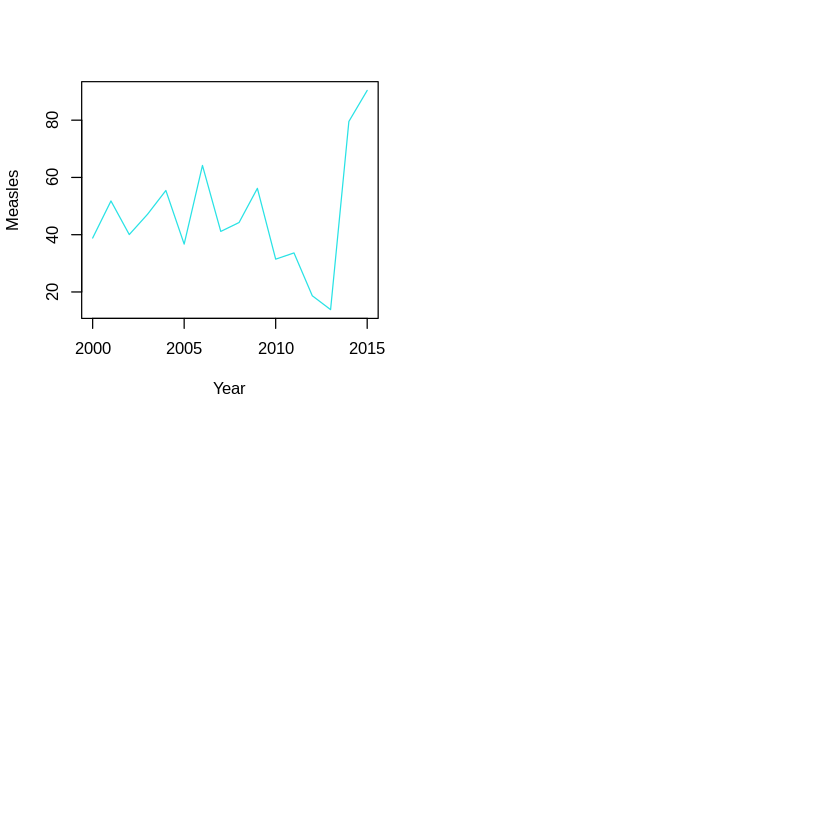

In [ ]:
par(mfrow=c(2,2))
 plot(data_india$Year, data_india$Hepatitis.B, type = "l", col = 1, ylim = c(0, 100),xlab="Year",ylab="Hepatitis.B")  # Plot with Base R
 plot(data_india$Year, data_india$Diphtheria, type = "l", col = 2 ,xlab="Year",ylab="Diphtheria")
 plot(data_india$Year,data_india$HIV.AIDS , type = "l", col = 3,xlab="Year",ylab="HIV.AIDS")
 plot(data_india$Year,data_india$Polio , type = "l", col = 4,xlab="Year",ylab="Polio")
 plot(data_india$Year,data_india$Measles/1000 , type = "l", col = 5,xlab="Year",ylab="Measles")
# legend("bottomright",legend = c("Hepatitis.B","Diphtheria","HIV.AIDS","Polio","Measles"),col = c("black","red","green","blue","skyblue"))





In [ ]:
data_devlpd <- data[which(data$Status == "Developed"),]

In [ ]:
data_devlpng <- data[which(data$Status == "Developing"),]

In [ ]:
head(data_devlpd)
dim(data_devlpd)

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<impute>,<dbl>,<int>,<int>,⋯,<int>,<impute>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
113,Australia,2015,Developed,82.8,59,1,3.755,0.000,93,74,⋯,93,5.755,93,0.1,56554.39,23789338,0.6,0.6,0.937,20.4
114,Australia,2014,Developed,82.7,6,1,9.710,10769.363,91,340,⋯,92,9.420,92,0.1,62214.69,2346694,0.6,0.6,0.936,20.4
115,Australia,2013,Developed,82.5,61,1,9.870,11734.854,91,158,⋯,91,9.360,91,0.1,67792.34,23117353,0.6,0.6,0.933,20.3
116,Australia,2012,Developed,82.3,61,1,10.030,11714.999,91,199,⋯,92,9.360,92,0.1,67677.63,22728254,0.6,0.6,0.930,20.1
117,Australia,2011,Developed,82.0,63,1,10.300,10986.265,92,190,⋯,92,9.200,92,0.1,62245.13,223424,0.6,0.6,0.927,19.8
118,Australia,2010,Developed,81.9,64,1,10.520,8875.786,92,70,⋯,92,9.200,92,0.1,51874.85,223175,0.7,0.6,0.927,19.5


[1] 512  22

In [ ]:
head(data_devlpng)
dim(data_devlpng)


,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


[1] 2426   22

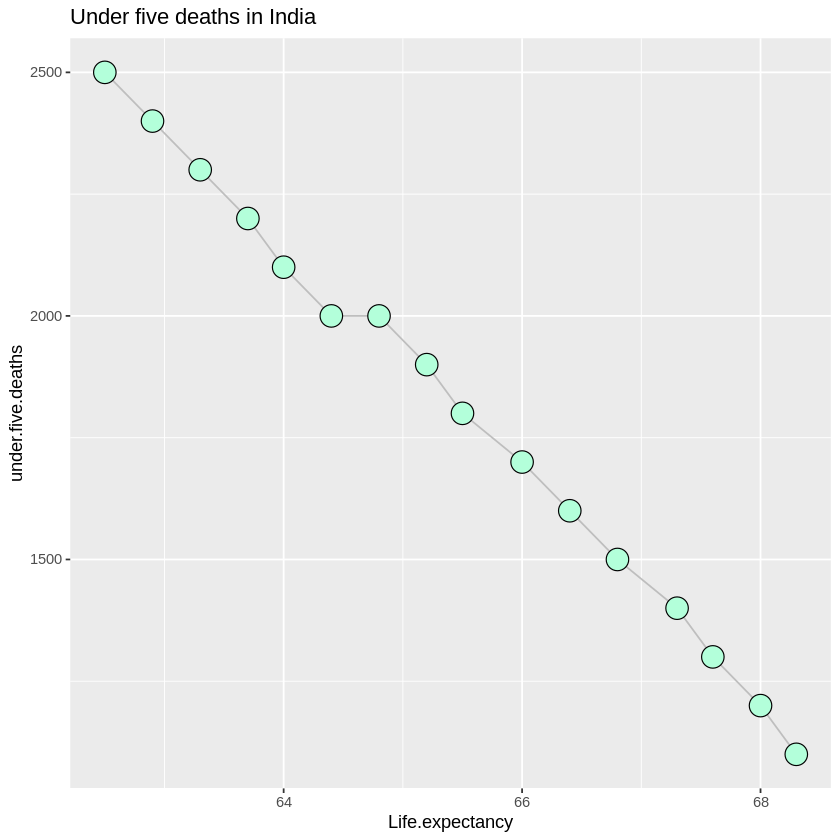

In [ ]:
ggplot(data_india, aes(x=Life.expectancy, y=under.five.deaths)) +
   geom_line( color="grey") +
    geom_point(shape=21, color="black", fill="#b3ffda", size=6) +
    ggtitle("Under five deaths in India")

`geom_smooth()` using formula 'y ~ x'



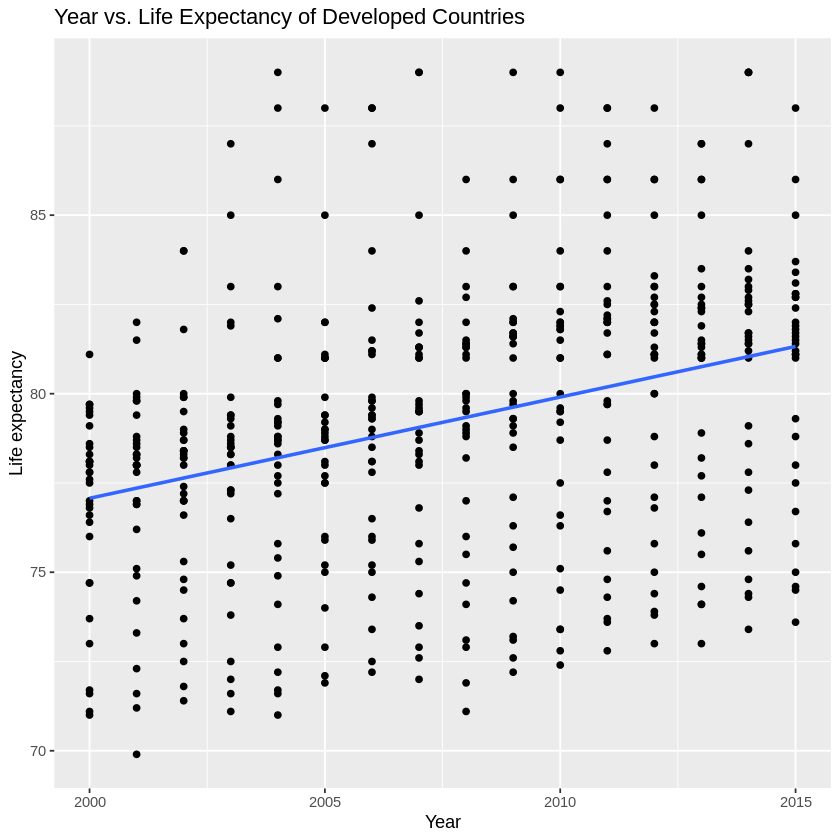

In [ ]:
ggplot(data_devlpd, aes(Year, Life.expectancy)) +
 	geom_point() + 
  geom_smooth(method="lm", se=F) +
  labs(
       y="Life expectancy", 
       x="Year", 
       title="Year vs. Life Expectancy of Developed Countries"
       )

Don't know how to automatically pick scale for object of type impute. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



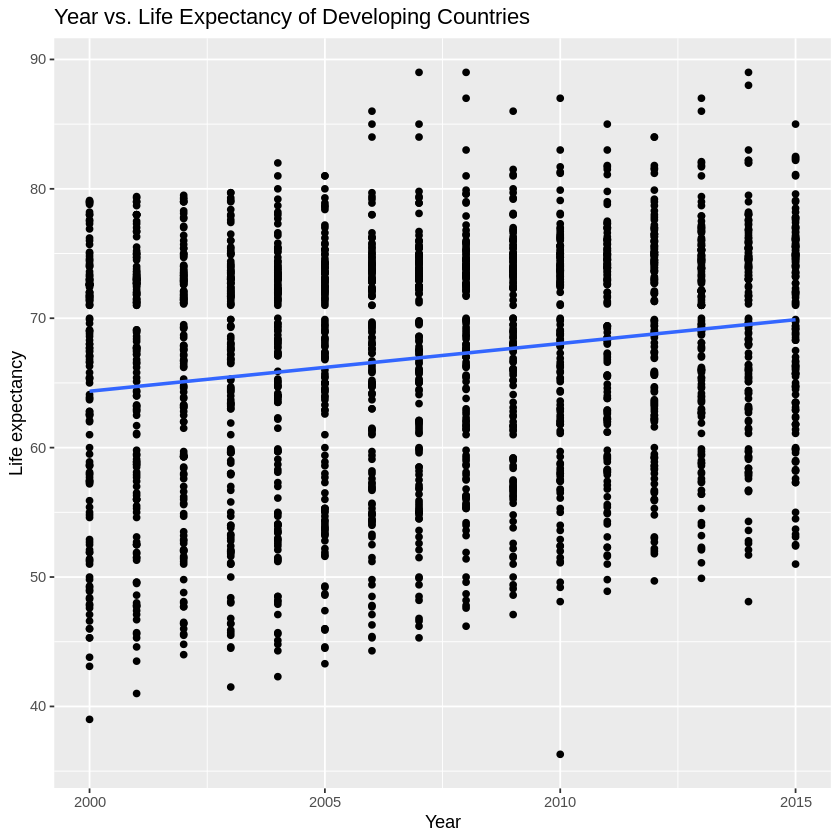

In [ ]:
ggplot(data_devlpng, aes(Year, Life.expectancy)) +
 	geom_point() + 
  geom_smooth(method="lm", se=F) +
  labs(
       y="Life expectancy", 
       x="Year", 
       title="Year vs. Life Expectancy of Developing Countries"
       )

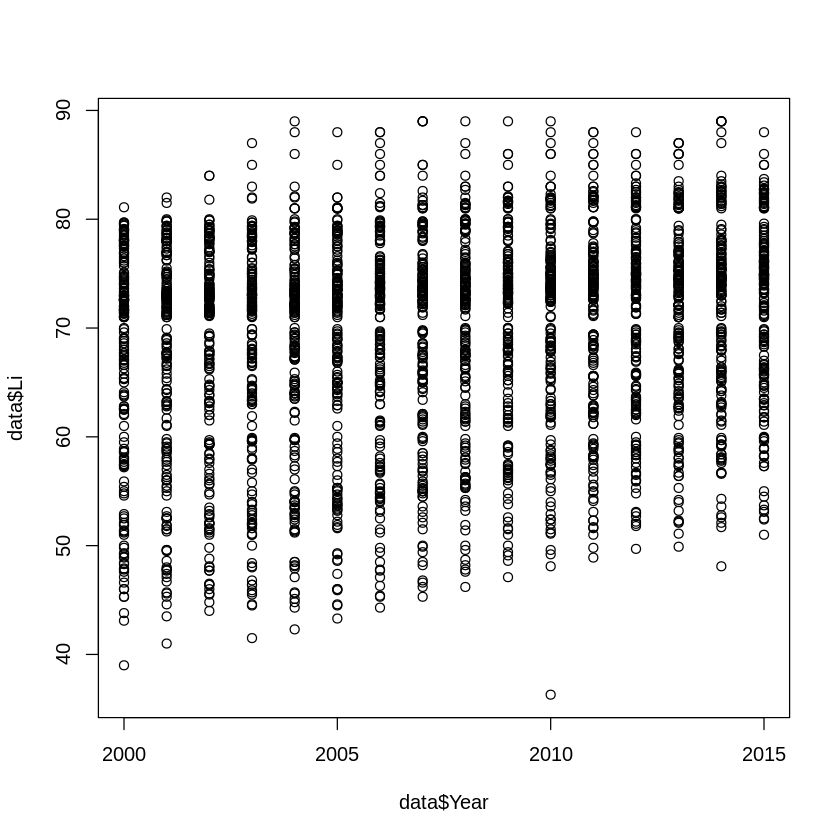

In [ ]:
plot(data$Year,data$Li)

Don't know how to automatically pick scale for object of type impute. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



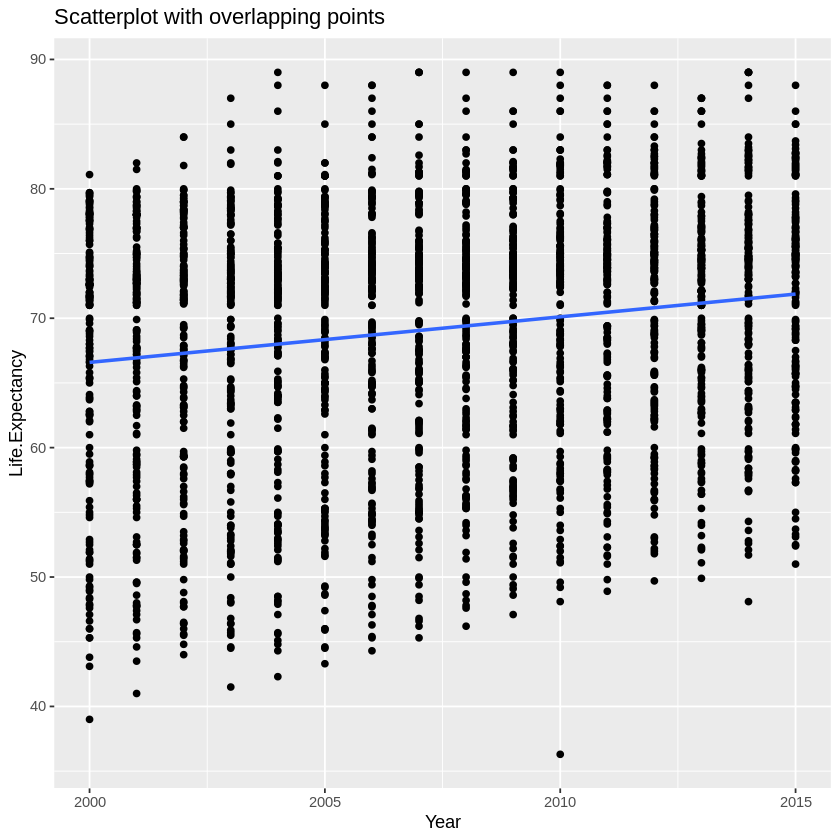

In [ ]:
ggplot(data, aes(Year, Life.expectancy)) +
 	geom_point() + 
  geom_smooth(method="lm", se=F) +
  labs(
       y="Life.Expectancy", 
       x="Year", 
       title="Scatterplot with overlapping points")

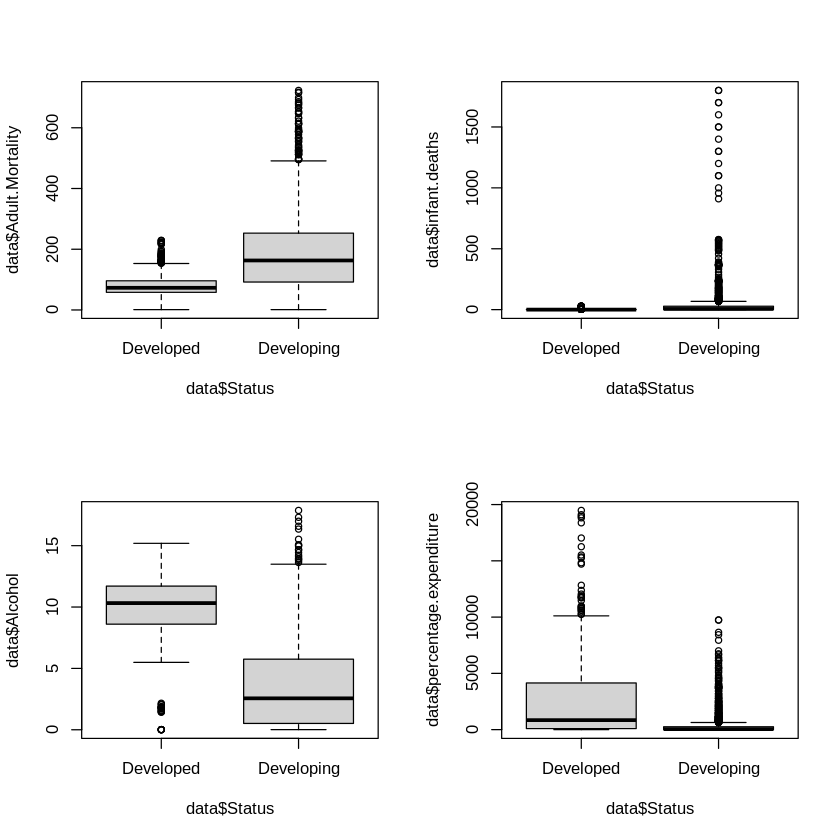

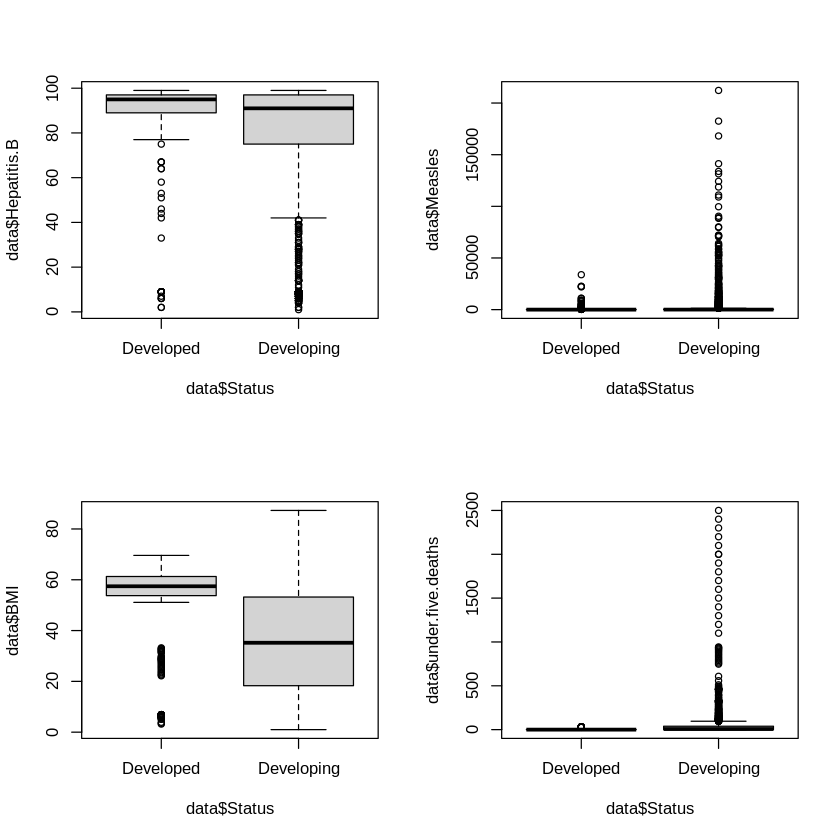

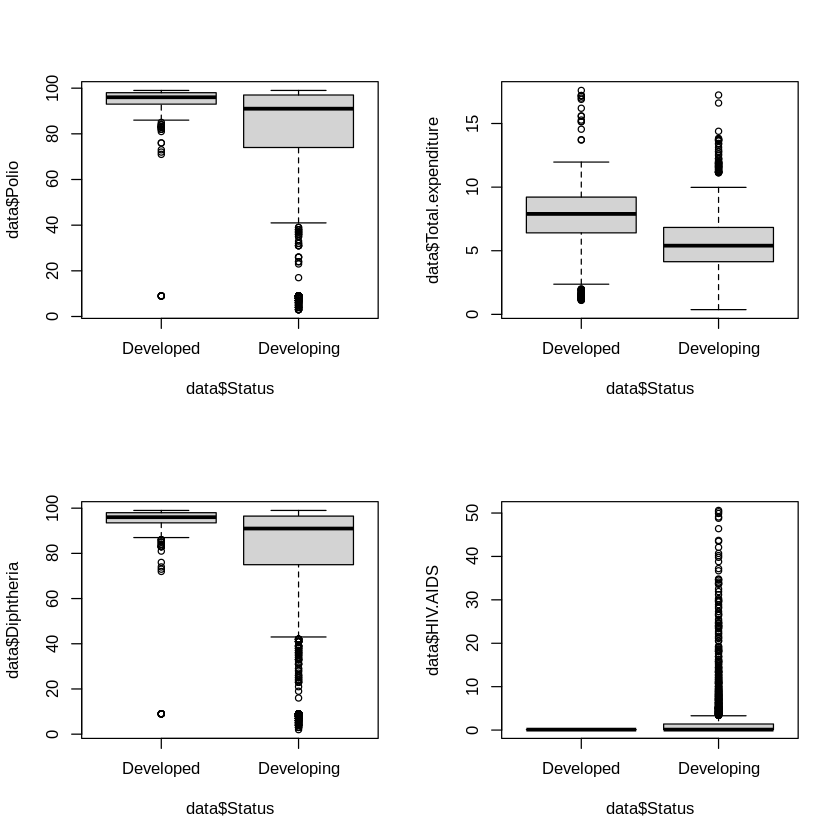

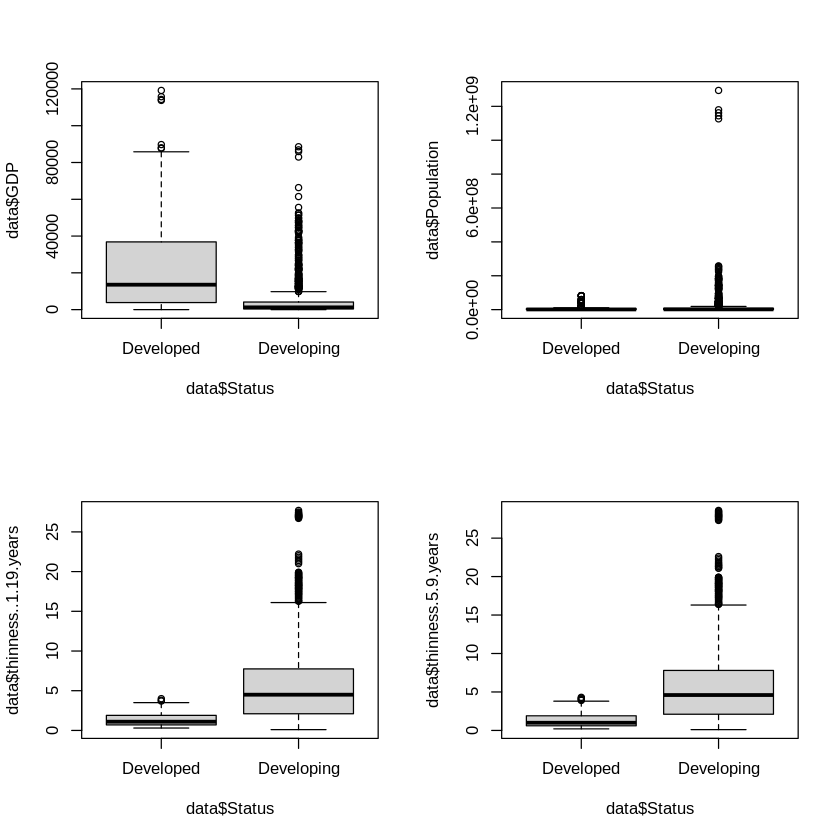

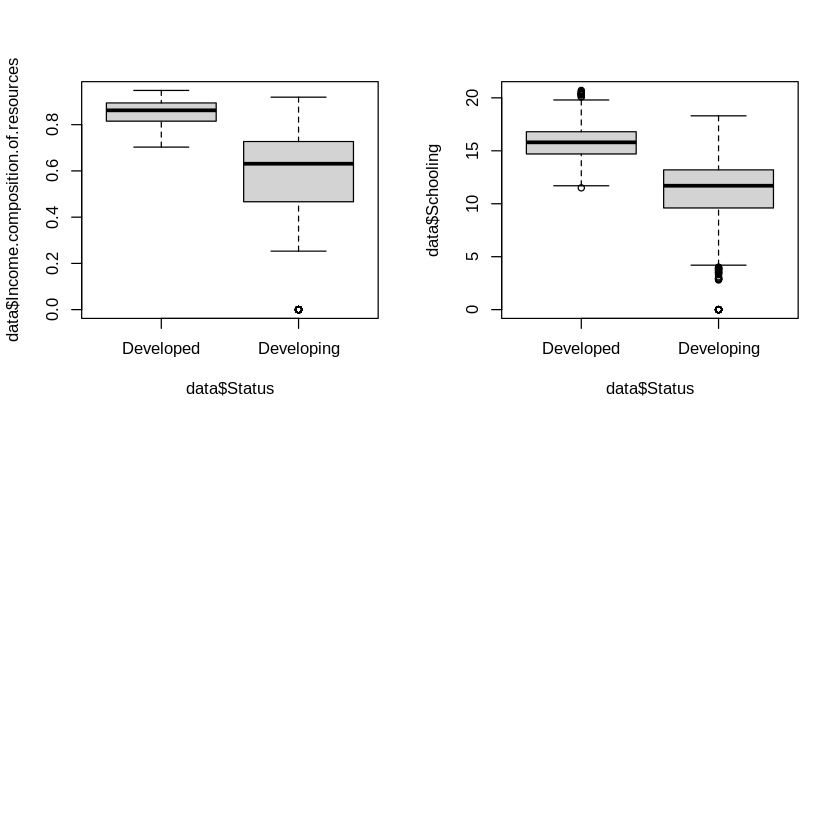

In [ ]:
par(mfrow=c(2,2))
boxplot(data$Adult.Mortality~data$Status)
boxplot(data$infant.deaths~data$Status)
boxplot(data$Alcohol~data$Status)
boxplot(data$percentage.expenditure~data$Status)
boxplot(data$Hepatitis.B~data$Status)
boxplot(data$Measles~data$Status)
boxplot(data$BMI~data$Status)
boxplot(data$under.five.deaths~data$Status)
boxplot(data$Polio~data$Status)
boxplot(data$Total.expenditure~data$Status)
boxplot(data$Diphtheria~data$Status)
boxplot(data$HIV.AIDS~data$Status)
boxplot(data$GDP~data$Status)
boxplot(data$Population~data$Status)
boxplot(data$thinness..1.19.years~data$Status)
boxplot(data$thinness.5.9.years~data$Status)
boxplot(data$Income.composition.of.resources~data$Status)
boxplot(data$Schooling~data$Status)

In [ ]:
train=subset(data, Year <= 2013)
test=subset(data, Year >= 2014)
dim(train)
dim(test)
#Scaling the data
scale = preProcess(train[,-c(1,2)], method = "range")
scaled.train = predict(scale, train[,-c(1,2)])
scale = preProcess(test[,-c(1,2)], method = "range")
scaled.test = predict(scale, test[,-c(1,2)])

[1] 2572   22

[1] 366  22

In [ ]:
train.LR=scaled.train
test.LR=scaled.test
#Base model with all variables
model1=lm(Life.expectancy~.,data=train.LR) 
summary(model1)
#final model
model2=lm(Life.expectancy~.-Population-Hepatitis.B-Alcohol-Total.expenditure-under.five.deaths,data=train.LR) 
summary(model2)


Call:
lm(formula = Life.expectancy ~ ., data = train.LR)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32154 -0.04040 -0.00047  0.04343  0.22150 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      0.346034   0.016343  21.174  < 2e-16 ***
StatusDeveloping                -0.019291   0.006755  -2.856 0.004355 ** 
Adult.Mortality                 -0.217361   0.013444 -16.168  < 2e-16 ***
infant.deaths                    3.170677   0.375217   8.450  < 2e-16 ***
Alcohol                         -0.041417   0.012213  -3.391 0.000714 ***
percentage.expenditure           0.110712   0.071148   1.556 0.119902    
Hepatitis.B                     -0.011552   0.008437  -1.369 0.171162    
Measles                         -0.028385   0.044945  -0.632 0.527780    
BMI                              0.055958   0.010270   5.448 5.93e-08 ***
under.five.deaths               -3.321269   0.379387  -8.754  < 2e-16 ***
Polio    


Call:
lm(formula = Life.expectancy ~ . - Population - Hepatitis.B - 
    Alcohol - Total.expenditure - under.five.deaths, data = train.LR)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33836 -0.03886  0.00171  0.04532  0.20400 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      0.324893   0.016105  20.174  < 2e-16 ***
StatusDeveloping                -0.005156   0.006330  -0.814  0.41553    
Adult.Mortality                 -0.241947   0.013638 -17.741  < 2e-16 ***
infant.deaths                   -0.078636   0.035647  -2.206  0.02754 *  
percentage.expenditure           0.115273   0.073423   1.570  0.11663    
Measles                          0.046724   0.045067   1.037  0.30001    
BMI                              0.060766   0.010580   5.744 1.12e-08 ***
Polio                            0.016711   0.009863   1.694  0.09043 .  
Diphtheria                       0.030158   0.010347   2.915  0.00361 ** 
H

In [ ]:
train.pred=train.LR
train.pred$predTrain=predict(model2, newdata = train.pred,type = "response")
#Mean Absolute ERROR
mae(train.pred$Life.expectancy,train.pred$predTrain)

#ROOT MEAN SQUARE ERROR
rmse(train.pred$Life.expectancy,train.pred$predTrain)


#Prediction using test data 
test.pred=test.LR
test.pred$predTest=predict(model2, newdata = test.pred,type = "response")

#Mean Absolute ERROR
mae(test.pred$Life.expectancy,test.pred$predTest)


#ROOT MEAN SQUARE ERROR
rmse(test.pred$Life.expectancy,test.pred$predTest)

[1] NA

[1] NA

[1] NA

[1] NA

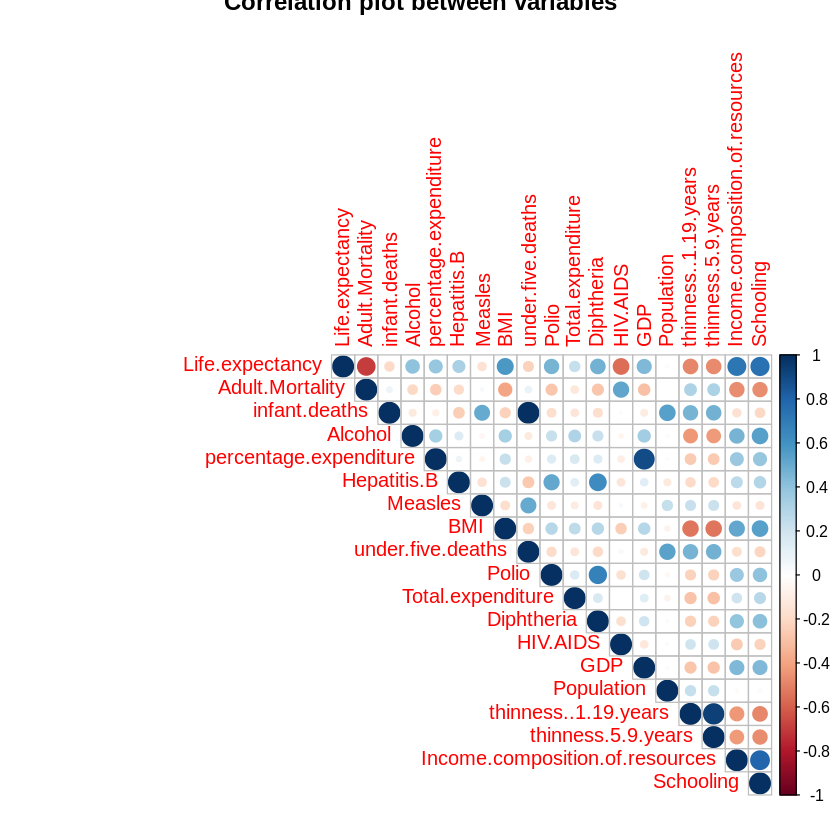

In [57]:
corrplot(cor(mydata1[,-c(1:3)]),type="upper",method="circle",title="Correlation plot between variables",mar=c(0.1,0.1,0.1,0.1))